In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
#index ---- index id of this paper
#* ---- paper title
#@ ---- authors (separated by semicolons)
#t ---- year
#c ---- publication venue
#% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)
#! ---- abstract

filePath = "/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/AP_train.txt"

def LoadAminerData(filePath):
    papersDS = []
    tempPaper = {'index': '', 'title': '', 'authors': [], 'year': '', 'venue': '', 'references': [], 'abstract': ''}

    with open(filePath, 'r') as fp:
        lcounter = 0
        for line in fp:
            line = line.rstrip()
            lcounter += 1
            
            if len(line) == 0:
                papersDS.append(tempPaper)
                tempPaper = {'index': '', 'title': '', 'authors': [], 'year': '', 'venue': '', 'references': [], 'abstract': ''}
                continue
                
            if line[0] != '#':
                print 'Error in parsing at: ' + str(lcounter)
            
            if line.startswith('#index'):
                tempPaper['index'] = line[6:].strip()
            elif line.startswith('#*'):
                tempPaper['title'] = line[2:].strip()
            elif line.startswith('#@'):
                tempPaper['authors'] = [i.strip() for i in line[2:].split(';')]
            elif line.startswith('#t'):
                tempPaper['year'] = line[2:].strip()
            elif line.startswith('#c'):
                tempPaper['venue'] = line[2:].strip()
            elif line.startswith('#%'):
                tempPaper['references'].append(line[2:].strip())
            elif line.startswith('#!'):
                tempPaper['abstract'] = line[2:].strip()
            else:
                print 'Error in parsing at: ' + str(lcounter)
                
        papersDF = pd.DataFrame.from_dict(papersDS, orient='columns')
        return papersDF
    return
    
papersDF = LoadAminerData(filePath)

In [3]:
#print papersDF.head(5)

In [4]:
#A. Compute the number of distinct authors, publication venues, publications, and citations/references
authorsSet = set()
for i in papersDF['authors']:
    for j in i:
        authorsSet.add(j)
print "Number of distinct authors: " + str(len(authorsSet))
authorsSet=None
print "Number of distinct publication venues: " + str(len(papersDF['venue'].unique()))
print "Number of distinct publications: " + str(len(papersDF))
        
referncesSet = [j for i in papersDF['references'] for j in i]
print "Number of citations: " + str(len(referncesSet))
referncesSet=None

Number of distinct authors: 1478739
Number of distinct publication venues: 255686
Number of distinct publications: 1976815
Number of citations: 7250326


In [ ]:
#B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?
for i in papersDF["venue"]:
    if("principles and practice of knowledge discovery in databases" in i.lower()):
        print i

In [11]:
#C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

authorPublications = defaultdict(set)
for i,row in papersDF.iterrows():
    for j in row["authors"]:
        if j!='':
            authorPublications[j].add(row["title"])

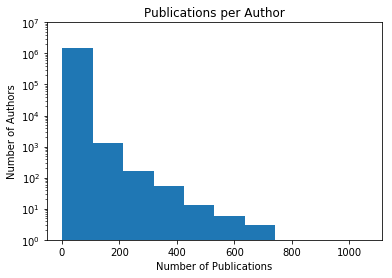

In [12]:
authorCountsList=[]
for i in authorPublications:
    authorCountsList.append(len(authorPublications[i]))

plt.hist(authorCountsList, bins=10,log=True)
plt.ylabel('Number of Authors')
plt.xlabel('Number of Publications')
plt.title('Publications per Author')

ax=plt.subplot(111)
ax.set_ylim(ymin=1,ymax=10**7)
plt.show()

In [13]:
#D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, 
#or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard 
#deviation and the 1st and 3rd quartiles.

NpAuthorCountsList = pd.DataFrame(np.asarray(authorCountsList))
print NpAuthorCountsList.describe()

authorCountsList = None
NpAuthorCountsList = None
authorPublications = None

                  0
count  1.478738e+06
mean   3.242165e+00
std    8.682919e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    2.000000e+00
max    1.061000e+03
0    3.242165
dtype: float64


'authorCountsList = None\nNpAuthorCountsList = None\nauthorPublications = None'

In [16]:
#E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?
venuePublications = defaultdict(list)
for i,row in papersDF.iterrows():
    if row["venue"]!='':
        venuePublications[row["venue"]].append(row["index"])
        
        

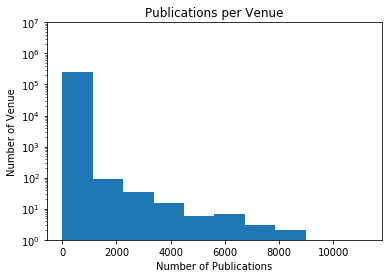

In [17]:
venueCountsList=[]
for i in venuePublications:
    venueCountsList.append(len(venuePublications[i]))


plt.hist(venueCountsList, bins=10,log=True)
plt.ylabel('Number of Venue')
plt.xlabel('Number of Publications')
plt.title('Publications per Venue')

ax=plt.subplot()
ax.set_ylim(ymin=1,ymax=10**7)
plt.show()

In [18]:
NpVenueCountsList = pd.DataFrame(np.asarray(venueCountsList))
print NpVenueCountsList.describe()

for i in venuePublications:
    if(len(venuePublications[i])==NpVenueCountsList.max()[0]):
        print i

#venueCountsList = None
#venuePublications = None
#NpVenueCountsList = None

                   0
count  255685.000000
mean        7.730966
std        83.381071
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max     11227.000000
IEEE Transactions on Information Theory


In [19]:
#F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?
def generateCitations(df):
    citations = defaultdict(int)
    
    for i in df["references"]:
        for j in i:
            citations[j]+=1
    
    citationsList=[]
    for i in df["index"]:
        citationsList.append(citations[str(i)])
    
    return citationsList

papersDF["citations"] = generateCitations(papersDF)

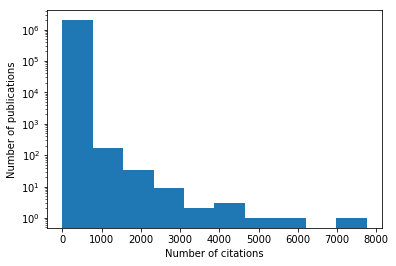

In [27]:
plt.hist(papersDF['citations'], bins=10,log=True)
plt.ylabel('Number of publications')
plt.xlabel('Number of citations')

plt.show()

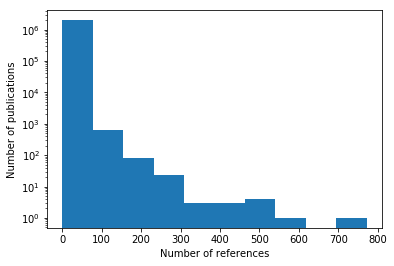

In [31]:
rlist=[]
for i in papersDF["references"]:
    rlist.append(len(i))

plt.hist(rlist, bins=10,log=True)
plt.ylabel('Number of publications')
plt.xlabel('Number of references')

plt.show()

In [81]:

pd.options.display.max_colwidth = 100

maxCit = papersDF["citations"].max()
print "Max number of citations:",papersDF[papersDF['citations'] == maxCit].title,maxCit

papersDF['rcount']=rlist
print "Max number of references:",papersDF[papersDF['rcount'] == max(rlist)].title,max(rlist)
del papersDF['rcount']

Max number of citations: 408394    Computers and Intractability: A Guide to the Theory of NP-Completeness
Name: title, dtype: object 7753
Max number of references: 719351    Cited References
Name: title, dtype: object 772


In [32]:
#G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results
impactFactorDict = {k: g["citations"].tolist() for k,g in papersDF.groupby("venue")}


In [33]:
impactFactorList = []
impactFactorDict1 = {}
for i in impactFactorDict:
    if i!="":
        tctr = 0
        for j in impactFactorDict[i]: 
            tctr+=int(j)
        impactFactorList.append(float(float(tctr)/len(impactFactorDict[i])))
        impactFactorDict1[i]=float(float(tctr)/len(impactFactorDict[i]))

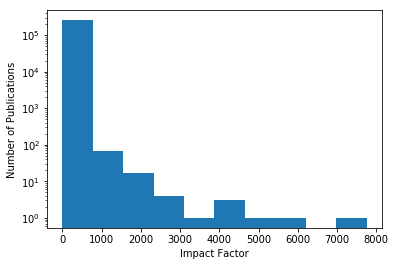

In [36]:
plt.hist(impactFactorList, bins=10,log=True)
plt.ylabel('Number of Publications')
plt.xlabel('Impact Factor')

plt.show()

In [37]:
#H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

impactFactorDict11 = sorted(impactFactorDict1.items(), key=operator.itemgetter(1), reverse=True)

for i in impactFactorDict11:
    print i
    break

('Computers and Intractability: A Guide to the Theory of NP-Completeness', 7753.0)


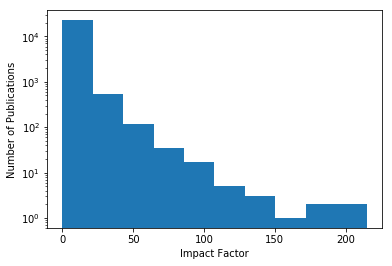

In [40]:
#I. Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?
impactFactorList1 = []
impactFactorDict1 = {}
for i in impactFactorDict:
    if i!="" and len(impactFactorDict[i])>=10:
        tctr = 0
        for j in impactFactorDict[i]: 
            tctr+=int(j)
        impactFactorList1.append(float(float(tctr)/len(impactFactorDict[i])))
        impactFactorDict1[i]=float(float(tctr)/len(impactFactorDict[i]))
        
plt.hist(impactFactorList1, bins=10,log=True)
plt.ylabel('Number of Publications')
plt.xlabel('Impact Factor')

#ax=plt.subplot()
ax.set_ylim(ymin=1,ymax=300000)
ax.set_xlim(xmin=1,xmax=8000)
plt.show()

In [47]:
impactFactorDict11 = sorted(impactFactorDict1.items(), key=operator.itemgetter(1), reverse=True)

for i in impactFactorDict11:
    print i
    break

print papersDF['citations'].describe()

('Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications', 214.82608695652175)
count    1.976815e+06
mean     3.667402e+00
std      2.287503e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      7.753000e+03
Name: citations, dtype: float64


In [ ]:
#J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.



In [48]:
publicationsRefDict = {k: g["references"].tolist() for k,g in papersDF.groupby("year")}

In [49]:
publicationsRefDict1={}
for i in publicationsRefDict:
    refCount=0
    for j in publicationsRefDict[i]:
        refCount+=len(j)
    if i!="":
        publicationsRefDict1[int(i)]=float(refCount)/float(len(publicationsRefDict[i]))

In [50]:
X = [k for k in sorted(publicationsRefDict1)]
y = [publicationsRefDict1[k] for k in sorted(publicationsRefDict1)]

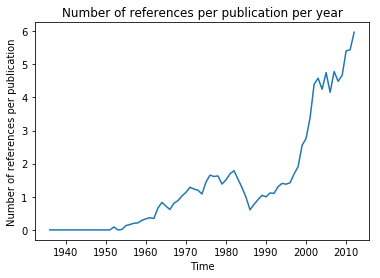

In [51]:
plt.plot(X, y)
plt.title("Number of references per publication per year")
plt.ylabel("Number of references per publication")
plt.xlabel("Time")
plt.show()

In [52]:
publicationsCitDict = {k: g["citations"].tolist() for k,g in papersDF.groupby("year")}

In [53]:
publicationsYearDict = {k: g["index"].tolist() for k,g in papersDF.groupby("year")}

In [54]:
citationsPerYear1={}
for i in publicationsYearDict:
    if i!='':
        tc=0
        
        for j in publicationsCitDict[i]:
            tc+=int(j)
            
        citationsPerYear1[i]=float(tc)/float(len(publicationsYearDict[str(i)]))

In [55]:
X = [k for k in sorted(citationsPerYear1)]
y = [citationsPerYear1[k] for k in sorted(citationsPerYear1)]

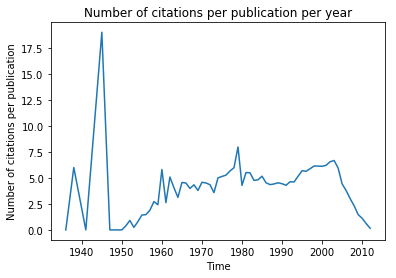

In [57]:
plt.plot(X, y)
plt.title("Number of citations per publication per year")
plt.ylabel("Number of citations per publication")
plt.xlabel("Time")
plt.show()